In this notebook, I employ predictive analytics, a potent method for gleaning insights from data and shaping data-driven decision-making. My exploration is grounded in the Facebook dataset, serving as the bedrock of this analysis. Central to my investigation is the anticipation of 'Content Type,' a pivotal metric within the social media domain. 'Content Type' encapsulates a multitude of engagement interactions, including likes, shares, reactions, comments, and saves. These interactions denote the extent to which individuals not only consumed but actively engaged with the content. To accomplish these predictions, I harness a meticulously curated set of features that persist throughout my analysis.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
path = "C:/Users/user/Downloads/DiceyTechHack"
data = pd.read_csv(path +"/TwitterData.csv")

In [10]:
data.head(6)

,Content Type,Sent by,Impressions,Potential Reach,Engagement Rate (per Impression),Engagements,Likes,Comments,Shares,Click-Through Rate,...,Other Engagements,Follows from Post,Unfollows from Post,Video Views,Media Views,Tags,PostHour,PostMonth,PostYear,num_post_words
0,1,Sophia Amuka,445,345718,0.04,16,4,2,1,0.00,...,0,0,0,0,1,CIB Posts,10,July,2023,299
1,2,Blessing Ubah,2961,347102,0.02,52,11,20,3,0.00,...,0,0,0,0,0,Other,20,July,2023,89
2,1,Blessing Ubah,850,347594,0.04,36,4,1,3,0.01,...,0,0,0,0,11,Weekly Wealth Posts,19,July,2023,215
3,1,Blessing Ubah,1499,349169,0.03,51,13,3,5,0.00,...,0,0,0,0,24,Other,18,July,2023,94
4,1,Sophia Amuka,1184,345653,0.02,18,7,3,1,0.00,...,0,0,0,0,3,"Insurance Limited Posts, Weekly Wealth Posts",12,July,2023,198
5,1,Sophia Amuka,4598,345734,0.02,70,12,18,1,0.00,...,0,0,0,0,15,Other,11,July,2023,57


In [4]:
data["Date"] = pd.to_datetime(data["Date"])
data["PostHour"] = data["Date"].dt.hour
data["PostMonth"] = data["Date"].dt.month_name()
data["PostYear"] = data["Date"].dt.year
data["num_post_words"] = data["Post"].str.len()

In [5]:
data["num_post_words"].isnull().sum()

0

In [6]:
data.drop("Post", axis=1, inplace=True)
data.drop("Date", axis=1, inplace=True)

In [7]:
numeric_data = data.select_dtypes(include=[np.number])
cat_data = data.select_dtypes(exclude=[np.number])
print ("There are {} numeric and {} categorical columns in train data".format(numeric_data.shape[1],cat_data.shape[1]))

There are 23 numeric and 4 categorical columns in train data


In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["Content Type"] = le.fit_transform(data["Content Type"])

In [9]:
data["Content Type"].value_counts()

1    6213
2    1018
3     883
0     415
Name: Content Type, dtype: int64

In [9]:
X = data.drop(["Content Type"],axis=1)
y = data["Content Type"]

In [10]:
le = LabelEncoder()

def processing_data(dataa):
     processed_data = data.copy()

     categ = ["Sent by",
              "Tags",
              "PostMonth"]
    
     for col in categ:
        processed_data[col] = le.fit_transform(processed_data[col])

     return pd.DataFrame(processed_data, columns = processed_data.columns) 

In [11]:
processed_X = processing_data(X) 

In [12]:
processed_X.shape

(8529, 27)

In [13]:
processed_X.head(2)

,Content Type,Sent by,Impressions,Potential Reach,Engagement Rate (per Impression),Engagements,Likes,Comments,Shares,Click-Through Rate,...,Other Engagements,Follows from Post,Unfollows from Post,Video Views,Media Views,Tags,PostHour,PostMonth,PostYear,num_post_words
0,1,11,445,345718,0.04,16,4,2,1,0.0,...,0,0,0,0,1,41,10,5,2023,299
1,2,2,2961,347102,0.02,52,11,20,3,0.0,...,0,0,0,0,0,76,20,5,2023,89


In [14]:
from sklearn.model_selection import train_test_split,KFold
from sklearn.feature_selection import SelectKBest,f_classif,mutual_info_regression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import accuracy_score

In [15]:
X_train,X_test,y_train,y_test = train_test_split(processed_X,y,test_size=0.2,random_state=42)

In [19]:
k = 25
selector = SelectKBest(score_func=f_classif,k=k)
X_selected = selector.fit_transform(X_train,y_train)
X_test_selected = selector.transform(X_test)

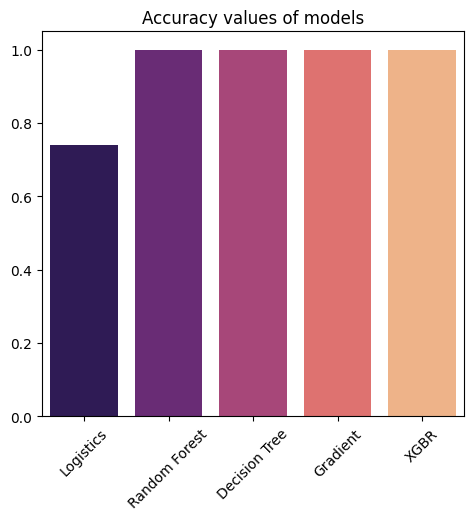

In [20]:
models = {"Logistics":LogisticRegression(),
          "Random Forest":RandomForestClassifier(random_state=42),
          "Decision Tree":DecisionTreeClassifier(random_state=42),
          "Gradient":GradientBoostingClassifier(random_state=42),
          "XGBR":XGBClassifier(random_state=42)
}

accuracy_values= []

for name, model in models.items():
     model.fit(X_selected,y_train)
     preds = model.predict(X_test_selected)
     accuracy = accuracy_score(y_test,preds)
     accuracy_values.append(accuracy)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)

sns.barplot(x= list(models.keys()), y = accuracy_values, palette = "magma")
plt.title("Accuracy values of models")
plt.xticks(rotation=45)
plt.show()

In [21]:
models = [
    RandomForestClassifier()
]

for model in models:
    model.fit(X_selected, y_train)
    y_pred = model.predict(X_test_selected)
    accuracy = accuracy_score(y_test, y_pred)

    # Print the accuracy score of the model
    print(f"Accuracy of {model.__class__.__name__} is {accuracy:.4f}")

Accuracy of RandomForestClassifier is 0.9982
